# Plotting OpenFOAM Solutions - CuttingPlane

- Reading in VTK files generated from OpenFOAM CuttingPlane utility

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pyvista as pv
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
pv.global_theme.font.family = 'times' 

## Read and Display the VTK File

In [3]:
mesh = pv.read('/Users/jrobrien/Dissertation/data/pmsCanister/pmsCanister_v8_tas120_aoa0_900T30_part9/postProcessing/cuttingPlane/1000/U_xNormal.vtk')


In [4]:
mesh

PolyData (0x17f1b8b80)
  N Cells:    12465
  N Points:   13050
  N Strips:   0
  X Bounds:   -1.000e+01, 1.000e+01
  Y Bounds:   -5.046e-17, 4.851e-17
  Z Bounds:   -1.000e+01, 1.000e+01
  N Arrays:   1

In [5]:
mesh['U']

pyvista_ndarray([[ 1.1999999e+02, -2.3299680e-07, -3.5309280e-05],
                 [ 1.2000000e+02, -5.3630430e-08, -8.8450124e-06],
                 [ 1.2000000e+02,  0.0000000e+00,  0.0000000e+00],
                 ...,
                 [ 1.2000110e+02, -2.5491466e-04, -3.4166782e-04],
                 [ 1.1999914e+02, -1.5721937e-04,  4.2298404e-03],
                 [ 1.2000076e+02, -1.3686746e-04, -3.0799574e-04]],
                dtype=float32)

In [6]:
mesh

PolyData (0x17f1b8b80)
  N Cells:    12465
  N Points:   13050
  N Strips:   0
  X Bounds:   -1.000e+01, 1.000e+01
  Y Bounds:   -5.046e-17, 4.851e-17
  Z Bounds:   -1.000e+01, 1.000e+01
  N Arrays:   1

In [7]:
mesh.plot(scalars='U', cmap='pyart_HomeyerRainbow')

Widget(value="<iframe src='http://localhost:50009/index.html?ui=P_0x17f1909a0_0&reconnect=auto' style='width: …

## Contour the Mesh

In [8]:
contours = mesh.contour(isosurfaces=np.arange(30, 160, 5))

In [9]:
# Create the plotter
pt = pv.Plotter()

#------------------
# Custom Scalar Bar
#------------------
# annotations to the colorbar
annotations = {
    120: "Freestream",
}

# Set a custom position and size
sargs = dict(height=0.10, 
             vertical=False, 
             position_x=0.2, 
             position_y=0.05, 
             fmt="%.0f", 
             color='white', 
             n_labels=6, 
             title='Velocity [m/s]')

# Add the mesh, add the scalar bar args
pt.add_mesh(mesh, opacity=0.85, cmap='pyart_HomeyerRainbow', scalar_bar_args=sargs)
# Add the contours
pt.add_mesh(contours, color="white", line_width=3)
# Add a ruler
pt.add_ruler(pointa=[-1, 0, 0.5],
             pointb=[1, 0, 0.5],
             title='Distance [m]'
            )
#pt.set_background('white')
pt.show_grid(color='black')
pt.view_xz()
#pt.set_scale(1,1,10)
pt.show()

Widget(value="<iframe src='http://localhost:50009/index.html?ui=P_0x17fe10a60_1&reconnect=auto' style='width: …

## Streamlines

In [10]:
line_streamlines = mesh.streamlines('U',
                                    pointa=(-5, 0, 1),
                                    pointb=(5, 0, -1),
                                    n_points=50,
                                    max_time=1000.0,
                                    compute_vorticity=False,  # vorticity already exists in dataset
                                   )

In [11]:
line_streamlines

PolyData (0x2916bb220)
  N Cells:    96
  N Points:   2383
  N Strips:   0
  X Bounds:   -9.998e+00, 9.973e+00
  Y Bounds:   -1.888e-03, 2.996e-03
  Z Bounds:   -1.001e+00, 1.002e+00
  N Arrays:   5

In [12]:
pt = pv.Plotter()

# Set a custom position and size
sargs = dict(height=0.10, 
             vertical=False, 
             position_x=0.2, 
             position_y=0.05, 
             fmt="%.0f", 
             color='white', 
             n_labels=6, 
             title='Velocity [m/s]')

# Add the mesh, add the scalar bar args
##pt.add_mesh(mesh, opacity=0.01, cmap='pyart_HomeyerRainbow', scalar_bar_args=sargs)
pt.add_mesh(mesh, opacity=0.1)
# Add a ruler
pt.add_ruler(pointa=[-1, 0, 0.5],
             pointb=[ 1, 0, 0.5],
             title='Distance [m]'
            )
# Add streamlines
pt.add_mesh(line_streamlines, lighting=False)
pt.view_xz()
#pt.show(cpos=camera_position)
pt.show()

Widget(value="<iframe src='http://localhost:50009/index.html?ui=P_0x17fdc7c70_2&reconnect=auto' style='width: …

In [13]:
mesh['U']

pyvista_ndarray([[ 1.1999999e+02, -2.3299680e-07, -3.5309280e-05],
                 [ 1.2000000e+02, -5.3630430e-08, -8.8450124e-06],
                 [ 1.2000000e+02,  0.0000000e+00,  0.0000000e+00],
                 ...,
                 [ 1.2000110e+02, -2.5491466e-04, -3.4166782e-04],
                 [ 1.1999914e+02, -1.5721937e-04,  4.2298404e-03],
                 [ 1.2000076e+02, -1.3686746e-04, -3.0799574e-04]],
                dtype=float32)

In [14]:
new_array = mesh['U'] - 120

In [15]:
new_array

pyvista_ndarray([[-7.62939453e-06, -1.20000000e+02, -1.20000038e+02],
                 [ 0.00000000e+00, -1.20000000e+02, -1.20000008e+02],
                 [ 0.00000000e+00, -1.20000000e+02, -1.20000000e+02],
                 ...,
                 [ 1.09863281e-03, -1.20000252e+02, -1.20000343e+02],
                 [-8.62121582e-04, -1.20000160e+02, -1.19995773e+02],
                 [ 7.62939453e-04, -1.20000137e+02, -1.20000305e+02]],
                dtype=float32)

## Plot Mesh Quality

In [16]:
qual = mesh.compute_cell_quality(quality_measure='scaled_jacobian')
qual

PolyData (0x2957b2280)
  N Cells:    12465
  N Points:   13050
  N Strips:   0
  X Bounds:   -1.000e+01, 1.000e+01
  Y Bounds:   -5.046e-17, 4.851e-17
  Z Bounds:   -1.000e+01, 1.000e+01
  N Arrays:   3

In [17]:
qual.plot(scalars='CellQuality')

Widget(value="<iframe src='http://localhost:50009/index.html?ui=P_0x17fe10df0_3&reconnect=auto' style='width: …

## Plot centerline through the PMS Canister

In [18]:
# Make two points to construct the line between
a = [-2, 0, 0]
b = [ 2, 0, 0]

# Preview how this line intersects this mesh
line = pv.Line(a, b)

p = pv.Plotter()
p.add_mesh(mesh)
p.add_mesh(line, color="white", line_width=10)
p.add_point_labels([a, b], ["A", "B"], font_size=48, point_color="red", text_color="red")
p.show()

/opt/homebrew/Caskroom/miniforge/base/envs/dissertation/lib/python3.9/site-packages/pyvista/utilities/helpers.py:507: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value="<iframe src='http://localhost:50009/index.html?ui=P_0x17fe10d00_4&reconnect=auto' style='width: …

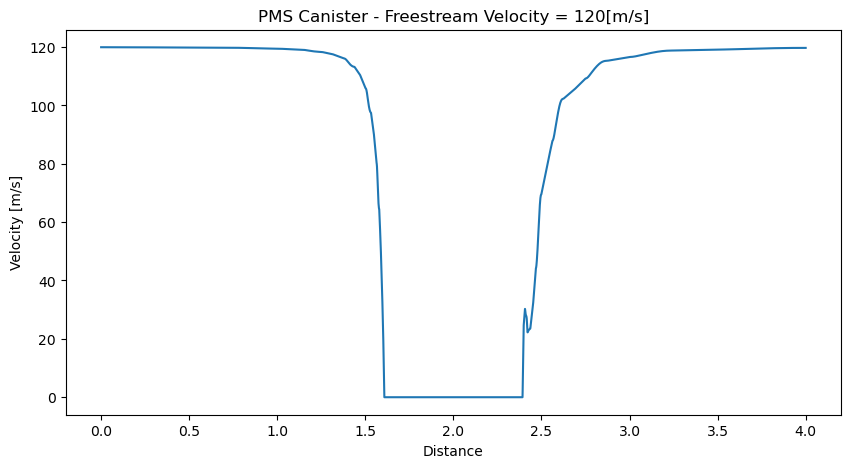

In [19]:
mesh.plot_over_line(a,
                    b,
                    resolution=10000,
                    title="PMS Canister - Freestream Velocity = 120[m/s]",
                    ylabel="Velocity [m/s]",
                    figsize=(10, 5),
                    )